# Classification Intro
## Types of Classification
### Binary Classification
`is this A or B?`,  `SPAM or NOT SPAM?`

### Multi-Class Classification
`Is this pizza, steak, or sushi?` `Is this a 1 or a 9?` 

### Multi-Label Classification
`What tags/labels should this article get?`  

## Topics To Consider With Classification Models
- the architecture of a neural network
- Input & Output shapes
  - photos of food to identified foods 
- Steps in modeling (creating, compiling, fitting, and evaluationg)
- Evaluation methods
- saving + loading a model

## Classification Example: Photo-to-food
### The Overview
- photos are (square) pixels
- photos have dimensions, say 256x256
- photos have pixels with colors, say rgb strings
- the pixels can be broken down into numbers based on img pixel coordinates
- the pixel numbers can be converted to tensors
- the tensors can get passed to models....etc

### The Inputs & Outputs
Pixels get converted to tensors & passed to machine learning models.  
Inputs could look like...
- `[batch_size, img_width, img_height, colour_channels]`
Outputs could look like...
- `[%likeSushi, %likeSteak, %likePotatos, ...etc]`

## Architecture of A Classification model
A Classification model could...
- be a sequential model
- contain several layers
  - an Input layer with a defined shape
  - an activiation-specified set of "inner" layers
  - a "softmax" final layer

### Classification Model Details & Hyperparameters
- **Input Layer Shape**: same as the number of features
- **Hidden Layers**: Problem-specific (_minimum 1 & maximum unlimited..._)
- **Neuros-Per-Hidden-Layer**: Problem-specific (generally 10-100)
- **Output layer shape**: 1-per-classification
- **Hidden Activation**: usually ReLu (rectified linear unit)
- **Output Activation**: usually softmax for multi-class or sigmoid for binary class
- **Loss Function**: Cross Entropy (categorical or binary)
- **Optimizer**: SGD or Adam

# Classification Evaluation Methods
(_tp: true-positive, tn: true-negative, fp: false-positive, fn: false-negative_)
## Accuracy
- (tp + tn) / (tp + tn + fp + fn)
- `tf.keras.metrics.Accuracy()`
- `sklearn.metrics.acuracy_score()`
- this is a default for classification
- NOT the best for imbalanced data (10_000 of A and 1_000 of B)

## Precision
- tp / (tp + fp)
- `tf.keras.metrics.Precision()`
- `sklearn.metrics.precision_score()`
- HIGHER precision means LESS fp

## Recall
- tp / (tp + fn)
- `tf.keras.metrics.Recall()`
- `sklearn.metrics.precision_score()`
- HIGHER recall means LESS fn

### Precision-to-Recall Tradeoff
Can't have both be high.  
Usually improving one decreases the other.

## F1-Score
- (precision * recall) / (recision + recall)
- `sklearn.metrics.f1_score()`
- a good "overall metric" for a classification model

# A Mock Classification Example
## Make Some Data

In [34]:
import tensorflow as tf
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# make_circles:
# A simple toy dataset to visualize clustering and classification algorithms.
# returns X as array of numbers
# returns y as binary classification options

# how much data
sampleCount = 1000
X, y = make_circles(sampleCount, noise=0.03, random_state=42)


# convert to pd datafram
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


## Visualize the data

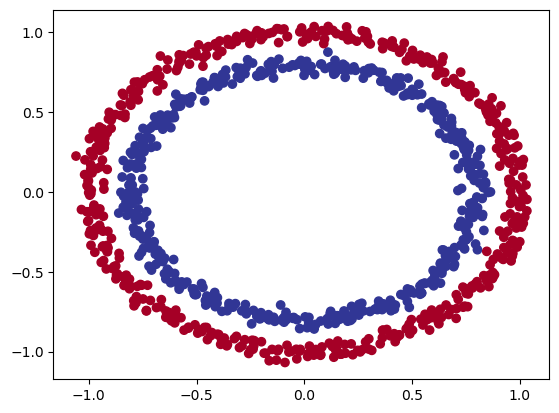

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Inspect Data Shapes

In [3]:
print(f'data SHAPES --> X: {X.shape}, Y: {y.shape}')
print(f'data LENGTHS --> X: {len(X)}, Y: {len(y)}')

data SHAPES --> X: (1000, 2), Y: (1000,)
data LENGTHS --> X: 1000, Y: 1000


In [4]:
X[0]

array([0.75424625, 0.23148074])

In [5]:
y[0]

1

## Model: Creation, Compilation, & Fit

In [6]:
tf.random.set_seed(42)
l1 = tf.keras.layers.Dense(1)
m1EpochCount = 5

# Create
m1 = tf.keras.Sequential()
m1.add(l1)

# Compile
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit
m1.fit(X, y, epochs=m1EpochCount)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 4.7893 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.5049 - accuracy: 0.4720
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 1.8135 - accuracy: 0.5080
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7381 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7062 - accuracy: 0.4930


## Model: More Epochs
The previous run looks like the accuracy is `~50%`. That's pretty bad.  

In [7]:
moreEpochs = 200
m1.fit(X, y, epochs=moreEpochs, verbose=0)

In [8]:
m1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## Model: Add Another Layer
Looks like more epochs did NOT make a meaningful impact.

In [9]:
midEpochs = 100
m2 = tf.keras.Sequential()
m2.add(l1)
m2.add(l1)
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m2.fit(X, y, epochs=midEpochs, verbose=0)

In [10]:
m2.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

Looks like MORE LAYERS didn't really help either: the accuracy is still `~50%`.

## Models: Ways To Update
- add layers
- increase the number of hidden units
- change the activation function
- change the optimization function
- change the learning rate
- fit more data
- fit for longer

## Models: Add Layer Hidden Units

In [11]:
m3 = tf.keras.Sequential()
dense100 = tf.keras.layers.Dense(100)
dense10 = tf.keras.layers.Dense(10)
dense1 = tf.keras.layers.Dense(1)

m3.add(dense100)
m3.add(dense10)
m3.add(dense1)

m3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m3.fit(X,y,epochs=100, verbose=0)

In [12]:
m3.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.7013 - accuracy: 0.5000


[0.701327919960022, 0.5]

Still no meaningful updates :(

## Model: Visualize Predictions
Create a reusable function that takes the `model`, the `x` & the `y` input and uses matplotlib to draw a chart

In [13]:
def plot_decision_boundary(model, X, y):
  """
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  #
  # Define the axis boundaries of the plot and create a meshgrid
  #
  x_axis_min, x_axis_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_axis_min, y_axis_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  axis_points = np.linspace(x_axis_min, x_axis_max, 100)
  xx, yy = np.meshgrid(axis_points,axis_points)
  
  #
  # Create X values (we're going to predict on all of these)
  #
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  #
  # Make predictions using the trained model
  #    
  y_pred = model.predict(x_in)

  #
  # Check for multi-class
  #
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #
  # Plot decision boundary
  #
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


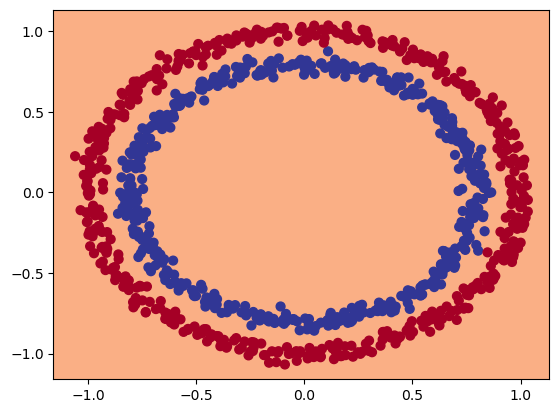

In [14]:
plot_decision_boundary(m3, X, y)

## Model: Several updates
- 2x dense layer with 4 neurons with relu activation
- output layer with 1 neuron, sigmoid activation
- learning-rate of .001

In [15]:
denseRelu4 = tf.keras.layers.Dense(4, activation="relu")
denseSigmoid1 = tf.keras.layers.Dense(1, activation="sigmoid")
tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
# Create a model
m5 = tf.keras.Sequential()
m5.add(denseRelu4)
m5.add(denseRelu4)
m5.add(denseSigmoid1)

# Compile the model
m5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
m5History = m5.fit(X, y, epochs=100, verbose=0)

In [16]:
m5.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6870 - accuracy: 0.5210


[0.6869539618492126, 0.5210000276565552]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


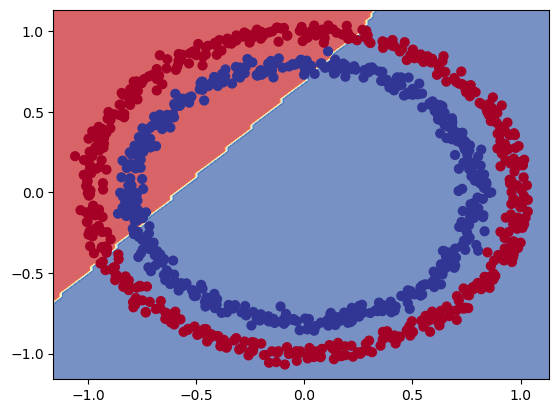

In [17]:
plot_decision_boundary(m5, X, y)

## Model: Change Optimizer Learning Rate

In [18]:
# testDataPercentage = .15 # how much of our data should we use for "testing"
# randomVal = 42
# feature_training_data, feature_testing_data, label_training_data, label_testing_data = train_test_split(X, 
#                                                     y, 
#                                                     test_size=testDataPercentage, 
#                                                     random_state=randomVal) # set random state for reproducible splits


# Split data into train and test sets
feature_training_data, label_training_data = X[:800], y[:800] # 80% of the data for the training set
feature_testing_data, label_testing_data = X[800:], y[800:] # 20% of the data for the test set

In [19]:
m6 = tf.keras.Sequential()
m6.add(denseRelu4)
m6.add(denseRelu4)
m6.add(denseSigmoid1)

# Compile the model
m6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
m6History = m6.fit(feature_training_data, label_training_data, epochs=30, verbose=0)

In [20]:
loss, accuracy = m6.evaluate(feature_testing_data, label_testing_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 1s 6ms/step - loss: 0.6633 - accuracy: 0.5250
Model loss on the test set: 0.663344144821167
Model accuracy on the test set: 52.50%


313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


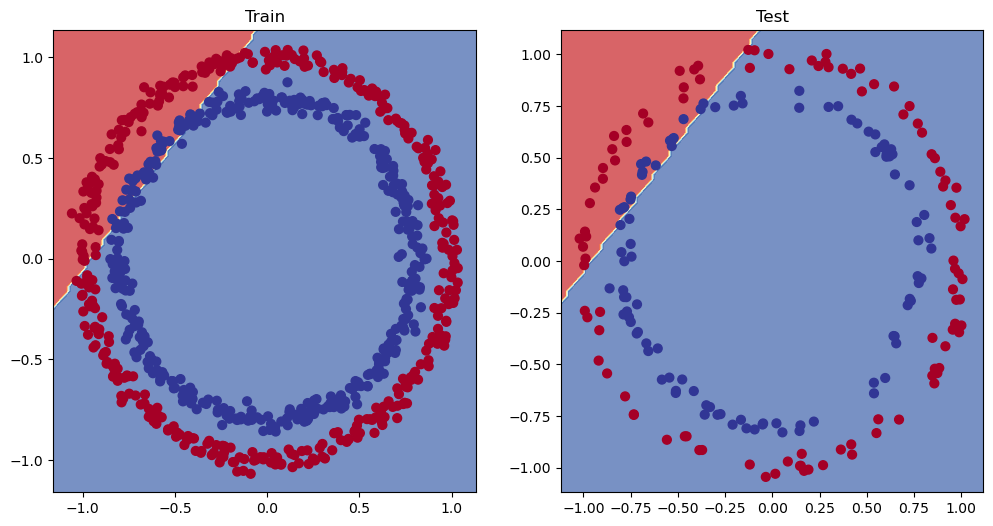

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m6, X=feature_training_data, y=label_training_data)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m6, X=feature_testing_data, y=label_testing_data)
plt.show()

## More Model Analysis
### Plot The Loss Curve

In [22]:
pd.DataFrame(m6History.history)

,loss,accuracy
0,0.686141,0.52500
1,0.684967,0.52875
2,0.683982,0.52750
3,0.682945,0.53375
4,0.681819,0.53250
5,0.681461,0.53125
6,0.679882,0.53625
7,0.679397,0.53500
8,0.678858,0.53625
9,0.677820,0.53250


Text(0.5, 1.0, 'm6 training curves')

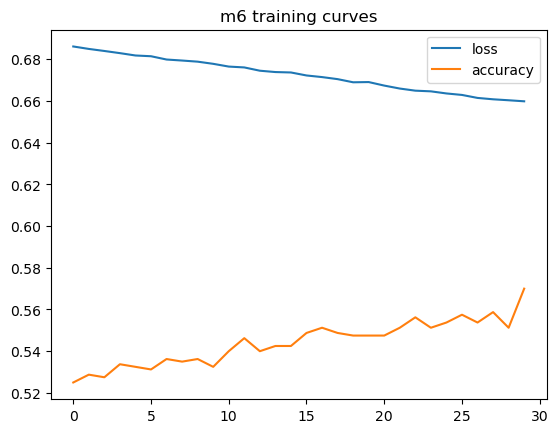

In [23]:
pd.DataFrame(m6History.history).plot()
plt.title("m6 training curves")

### Find The Best Learning Rate
Playing around with the learning rate can be part of experimenting with machine learning.  

A learning-rate **callback function** can be used to edit the model learning-rate based on the epoch number. Here, a lambda function  will be used to increase the learning rate every epoch.

In [24]:
tf.random.set_seed(42)

# Create a model (same as model_8)
m7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
m7.compile(loss="binary_crossentropy",
           # tf.keras.optimizers.Adam()
           optimizer="Adam",
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
m7History = m7.fit(feature_training_data,
                      label_training_data,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.7672 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7639 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7606 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7570 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7533 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7496 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7456 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7417 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss:

### Visualize The Model Performance
Visualizing _by epoch_...
- **loss**: how much error is happening between "guessed" output and "real" output, per-epoch. An ideal would be to see a downward slop from beginning to end
- **accuracy**: how accurate the model is per-epoch. An ideal would be to see an increase over time
- **learning-rate (lr)**: how "fast" the model is learning, per-epoch. An ideal here could be to see a "hockey stick", increasing learning-rate over time

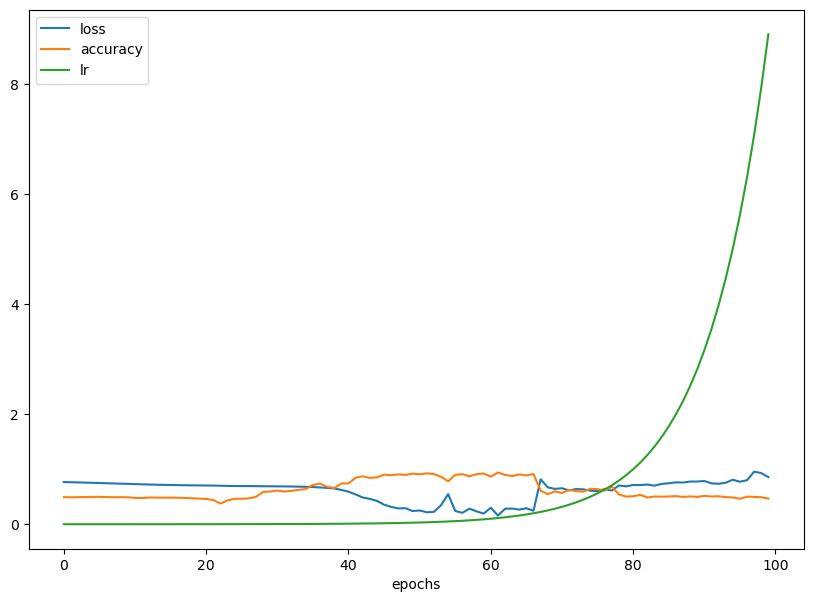

In [25]:
pd.DataFrame(m7History.history).plot(figsize=(10,7), xlabel="epochs");

### Visualize Loss Vs Learning
Loss vs. learning can be super critical for "finding" the "ideal" learning-rate.  
The LEAST loss means the best guess.  
The learning-rate that "intersects" with the least loss is, potentially, the "best" learning-rate.  

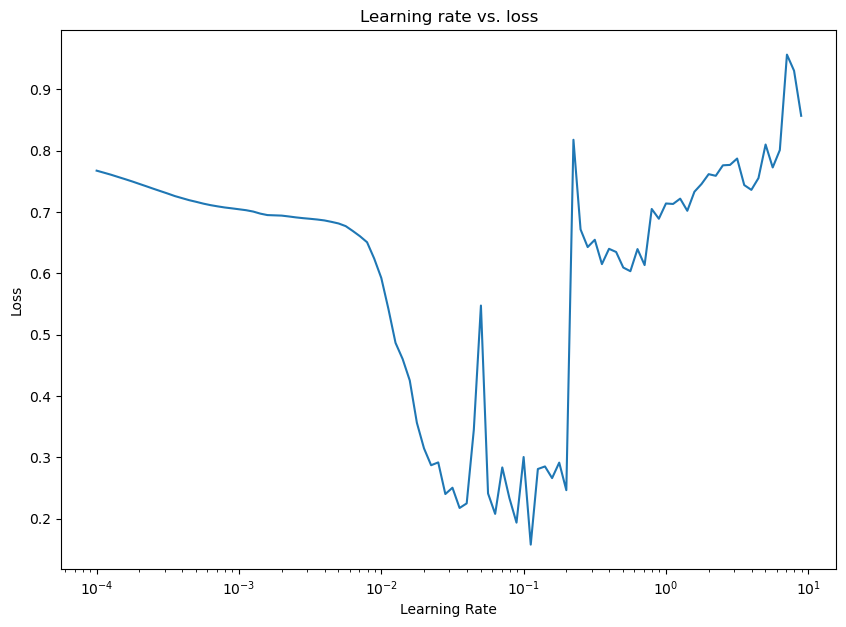

In [26]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, m7History.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [27]:
# using 10 exp -2 (.01), lets try using .02

# Create the model
m8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
m8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
m8History = m8.fit(feature_training_data, label_training_data, epochs=30)

Epoch 1/30
25/25 [==============================] - 2s 6ms/step - loss: 0.6912 - accuracy: 0.4950
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5437
Epoch 3/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.5875
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.6237
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6217 - accuracy: 0.6450
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.6625
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.6875
Epoch 8/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5383 - accuracy: 0.7362
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5071 - accuracy: 0.7625
Epoch 10/30
25/25 [==============================] - 0s 5ms/step - loss: 0.4855 - accuracy: 0.7725
Epoch 11/30
25/25 [

In [31]:
m8Loss, m8Accuracy = m8.evaluate(feature_training_data, label_training_data)

25/25 [==============================] - 0s 5ms/step - loss: 0.0475 - accuracy: 0.9987


313/313 [==============================] - 2s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


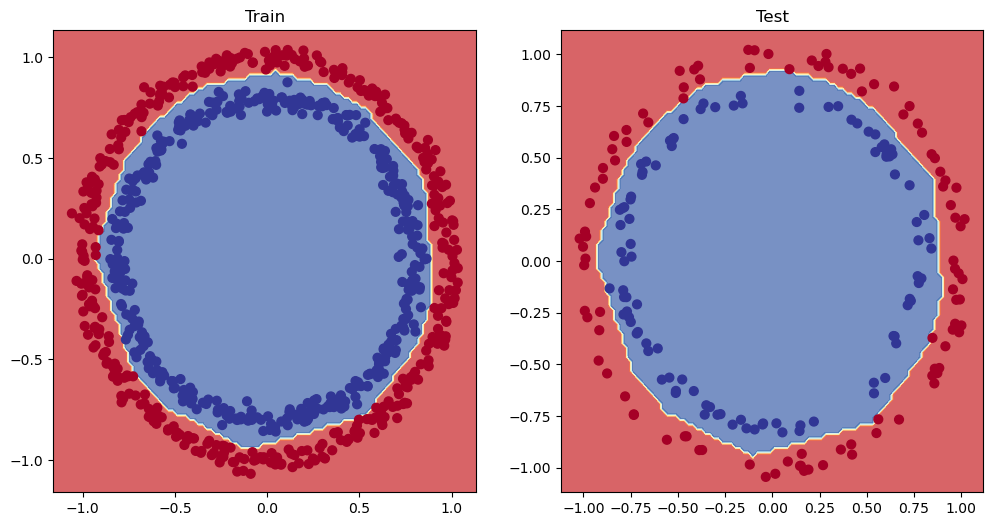

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m8, X=feature_training_data, y=label_training_data)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m8, X=feature_testing_data, y=label_testing_data)
plt.show()

### Check Accuracy of Model

In [33]:
print(f'Loss on test Data: {m8Loss}')
print(f'Accuracy on test Data: {m8Accuracy*100:.2f}%')

Loss on test Data: 0.04752160981297493
Accuracy on test Data: 99.87%


### Make a Confusion Matrix
a visual square of 4 squares, comparing tp, tn, fp,fn

In [46]:
m8LabelPredictions = m8.predict(feature_testing_data)

7/7 [==============================] - 0s 4ms/step


In [47]:
# AN ERROR!
confusion_matrix(label_testing_data, m8LabelPredictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [48]:
label_testing_data[0]

1

In [49]:
m8LabelPredictions[0]

array([0.9690342], dtype=float32)

The datatypes between the testing and prediction data are not the same :/ 
Predictions data contains **prediction probabilities**.  
For the sake of visualizing a confusion matrix, these can be converted to 0-and-1.  

In [50]:
reshapedPredictionData = tf.round(m8LabelPredictions)

In [51]:
confusion_matrix(label_testing_data, reshapedPredictionData)

array([[101,   0],
       [  0,  99]])

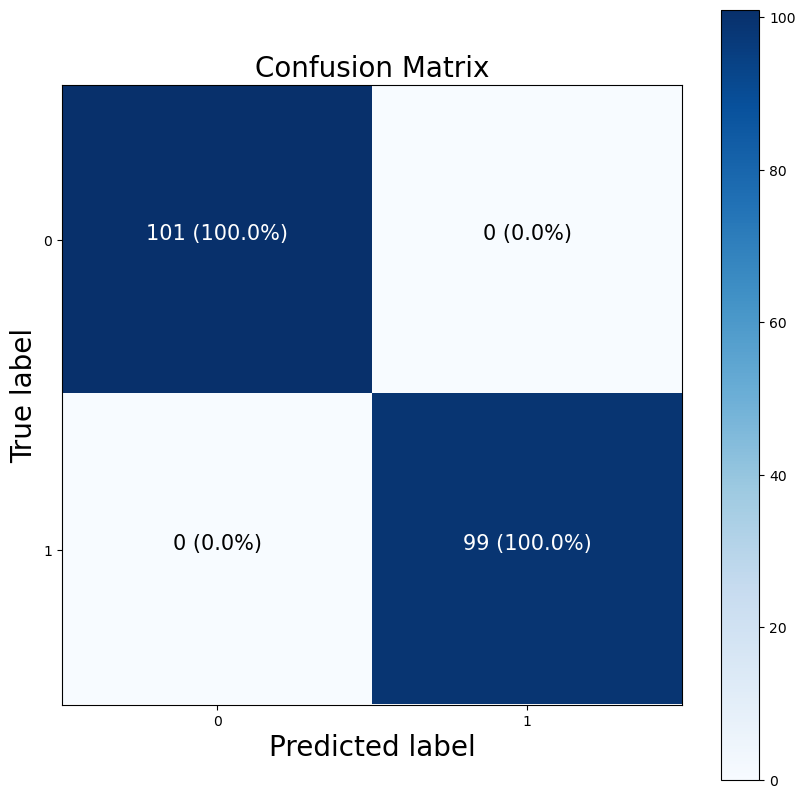

In [58]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)
titleText = "Confusion Matrix"
xLabelText= "Predicted label"
yLabelText = "True label"
axisSize = 20

# Create the confusion matrix
cm = confusion_matrix(label_testing_data, reshapedPredictionData)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title=titleText,
       xlabel=xLabelText,
       ylabel=yLabelText,
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(axisSize)
ax.yaxis.label.set_size(axisSize)
ax.title.set_size(axisSize)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)